# Curing Cancer with Machine Learning  
<p><img alt="cancer awareness logo" height="100px" src="https://drive.google.com/uc?id=1qAjUzJfPTJC1gRAE0D6HMqgYczdk_q7o" align="center" hspace="500px" vspace="0px"></p>

According to WHO, "breast cancer is the most frequent cancer among women, impacting 2.1 million women each year, and also causes the greatest number of cancer-related deaths among women. In 2018, it is estimated that 627,000 women died from breast cancer – that is approximately 15% of all cancer deaths among women". Here we want to see a glimpse of what can be done to identify cancer using machine learning.

## Importing Data, preprocessing 
sklearn library has a number of dataset including the [Wisconsin Breast Cancer Diagnostic dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). To begin we import some libraries and the dataset. Some preprocessing is necessary before we get to see the data in as a familiar DataFrame.

In [123]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# preprocessing, please do not change this part
cancer = load_breast_cancer()
columns = np.append(cancer.feature_names,['target'])
index = pd.RangeIndex(start=0, stop=len(cancer.data), step=1)
data = np.append(cancer.data, cancer.target[:,None], axis=1)
cancer_df = pd.DataFrame(data=data, index=index, columns=columns)

In [124]:
# use the head method to see the first 10 entires of cancer_df
# write your code here

cancer_df[:10]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


In [125]:
# List features that are deemed to be important in identifying breast cancer (i.e. list the column names)
# write your code here
features = cancer_df.columns.tolist()[:-1]

In [126]:
# how many features are list in the cancer_df (do not include target)
# write your code here
len(features)

30

Imagine you only want to work with features that are most directly correlated with the target. Thankfully, pandas has a tool for this. 


In [127]:
# Use .corr method for DataFrames to find correlation matrix. 
corr = cancer_df.corr()

# Since we are interested in correlation with 'target' column, we only need the 'target' column of this matrix
corr_with_target = corr["target"]

# can you sort this so that you can see more relevant features first. (what method does pandas Series have for sorting)
corr_with_target_sorted =  abs(corr_with_target).sort_values(ascending=False)
corr_with_target_sorted

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

## Setting up supervised learning dataset

We are going to use only the top three features from `corr_with_target_sorted` for our data set. Define `X` to be the values of those three features and `y` to be the target values. (Chooices of `X` and `y` is pretty common in machine learning literature for input values and label values. Notice that upper case `X` emphasizes `X` is a matrix. Lowercase `y` emphasizes `y` is a vector.

In [128]:
top_features = ["worst concave points", "worst perimeter", "mean concave points"]
X = cancer_df[top_features]
y = cancer_df["target"]

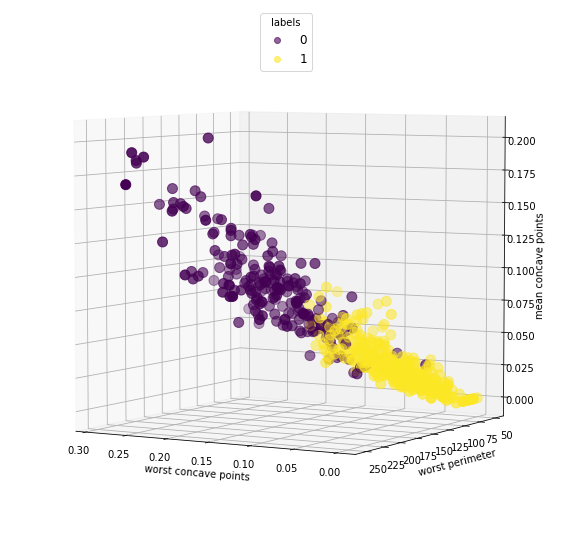

In [129]:
# this blocks shows a 3D plot of our train set. The symbols are highlighted based on their lables.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X["worst concave points"], X["worst perimeter"], X["mean concave points"], marker = 'o', c = y, s= 100)
ax.set_xlabel("worst concave points")
ax.set_ylabel("worst perimeter")
ax.set_zlabel("mean concave points")
ax.view_init(elev=5., azim=120)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop='colors', alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper center", title="labels", fontsize=12)

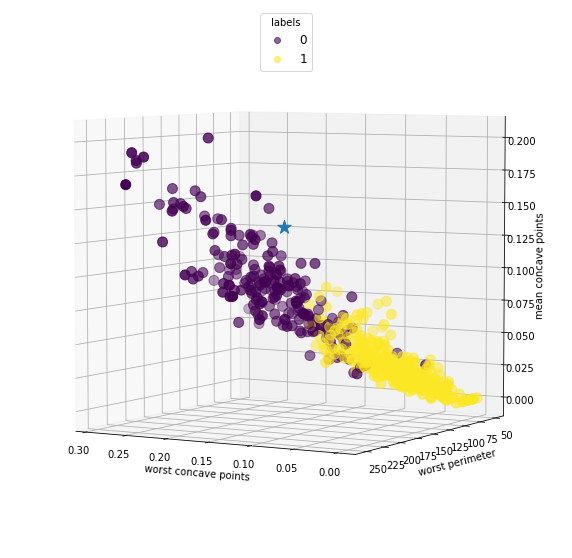

In [130]:
# A new patient data has the following values 
# "worst concave points" =0.2, "worst perimeter" = 100, and "mean concave points" = 0.13
# we add this new dataset to our figure, and use a blue star to show this point 
ax.scatter(0.2, 100, 0.13, marker = '*', s= 200)
fig

# Do you think this patient has a cancer? 

## Implementing a k-Nearest Neighbours algorithm

k-Nearest Neighbours method works on the basis of distance of two vectors. 
Consider n-dimensional vectors \
<center>
$\mathbf{a}=[a_1, a_2, ..., a_n]$ ,
$\mathbf{b} = [b_1, b_2, ..., b_n]$, 
</center>

the Euclidean distance between these two vectors is defined by: 
<center>
$dist(\mathbf{a}, \mathbf{b}) = 
\sqrt{(a_1-b_1)^2 + (a_2-b_2)^2 + ... + (a_n-b_n)^2}$. 
</center>

We now write a function to compute the distance of two n-dimensional vectors:

In [131]:
def lesson6_q2_compute_distance_fast(a, b):
    """
    complete the function dist_fast below. a and b are two numpy vectors,
    return the distance between these two vectors. 
    loops are slow and boring. don't use any loops for this function.
    we first check if the inputs are both numpy arrays. 
    If not, we turn them to numpy array. 
    If the a and b have different size, throw a value error
    """
    
    # write your code here (~2-10 lines)
    a, b = np.array(a), np.array(b)
    if a.shape != b.shape:
        raise ValueError("Vectors must have equal shapes")


    return ((a - b) ** 2).sum() ** 0.5

We want to compute the 3-nearest neighbour of the new point `new_data` (e.g. the blue star). We will write a function to compute the distance of point `new_data` from from every other points in `all_data`. Then return the index of the closest `k` neighbours. 

In [140]:
def lesson6_q3_find_knn_indices(all_data, new_data, k):
    """
    this function returns the index of the `k` nearest neighbours of vector 
    `new_data` among candidates `all_data` 
    :param all_data: 2d numpy array of all labeled data, with size N by b where N is 
                    the number of data instances and b is the number of features.
    :param new_data: 1d numpy array, a new point
    :param k: number of neighbours

    return: list of integers
    """

    distances = np.array([lesson6_q2_compute_distance_fast(v, new_data) for v in all_data.values])
    return np.argsort(distances)[:k]

    # data_copy = all_data.copy()
    # data_copy["distances"] = distances
    
    # return data_copy.sort_values(by="distances")[:k]

    

Finally, write a function that assign the most common label among the neighbours to any new point x_new 

In [143]:
neighbors = lesson6_q3_find_knn_indices(X, [2, 1.8, 1.4], 10)
label = y[neighbors].mean() > 0.5

"Cancer" if label == 1 else "Safe"

'Cancer'